In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
churn_df = pd.read_csv("/content/Churn_Modelling.csv")

# display the data
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [3]:
print(f"The churn dataset has {churn_df.shape[0]} and {churn_df.shape[1]} columns ")

The churn dataset has 10002 and 14 columns 


In [4]:
# Data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [5]:
# Summary statistics
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
# Check for missing data
churn_df.isna().sum()

# Drop missing values since they're insignificant
churn_df = churn_df.dropna()

In [7]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [8]:
# Check for duplicates => CustomerId
churn_df["CustomerId"].duplicated()

#check the rows with the duplicates
duplicate_rows = churn_df[churn_df["CustomerId"].duplicated(keep=False)]
duplicate_rows



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [9]:
#drop duplicates
churn_df.drop_duplicates(inplace=True)

In [10]:
#Drop unnecessary columns
churn_df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


## **Feature Engineering**

In [11]:
# Define the data and target columns
y = churn_df["Exited"] # target variabe

X = churn_df.drop(columns=["Exited"]) # features

In [12]:
# Distinguish the Numerical and Categorical variables
num_columns = ["CreditScore", "Balance", "EstimatedSalary", "Age", "Tenure"]
cat_columns = ["Geography", "Gender", "HasCrCard", "IsActiveMember", "NumOfProducts" ]

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier

#Define the test & train dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

# Normalize the data
preprocessor = ColumnTransformer(
    [
        ("num", StandardScaler(),num_columns),
        ("cat", OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"), cat_columns)
    ]
)

## **Baseline - Logistic Regression**

In [21]:
# Define the Logistic Regression Pipeline
lr_pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("lr", LogisticRegression())
    ]
)

# Fit the pipeline to the training data
lr_pipe.fit(X_train, y_train)

# Evaluate the pipeline using cross-validation
lr_cv_results = cross_validate(lr_pipe, X_train, y_train, return_train_score=True, cv=5, scoring="roc_auc")

# print the ROC-AUC score
print(f"""The Mean ROC-AUC:{lr_cv_results["test_score"].mean():.3f}""")

The Mean ROC-AUC:0.829


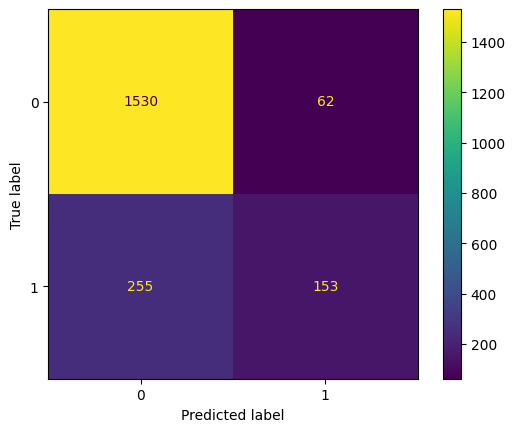

In [22]:
# make prediction on the X_test using LR Model
preds = lr_pipe.predict(X_test)

# Plot the the confusion matrix
cnf_matrix = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(cnf_matrix, display_labels= lr_pipe.classes_)
disp.plot()
plt.show()


In [24]:
# Display the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1592
           1       0.71      0.38      0.49       408

    accuracy                           0.84      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.83      0.84      0.82      2000



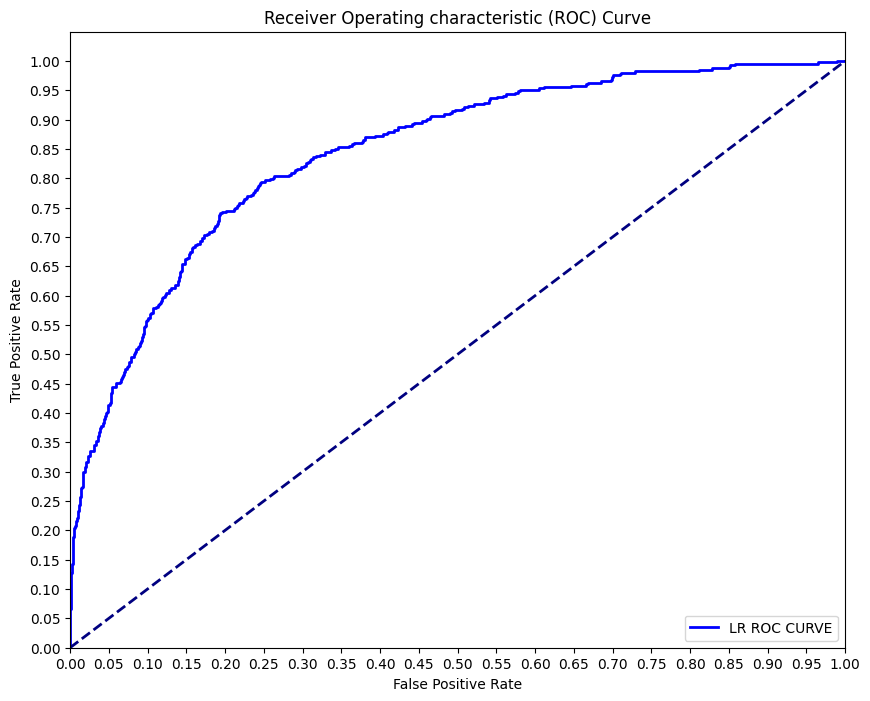

In [26]:
# Plot the roc-auc curve
from sklearn.metrics import roc_curve

# y_train_score = lr_pipe.decision_function(X_train)
lr_test_score = lr_pipe.decision_function(X_test)

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_test_score)

plt.figure(figsize=(10,8))
lw =2

plt.plot(lr_fpr, lr_tpr, color="blue", lw=lw, label="LR ROC CURVE")

plt.plot([0,1], [0,1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [28]:
#Calculate the Area Under Curve(AUC)
from sklearn.metrics import auc
print(f"""LR AUC: {auc(lr_fpr, lr_tpr):.3f}""")

LR AUC: 0.844


## **Random Forests**

In [36]:
# Define Pipeline
rf_pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("rf", RandomForestClassifier())
    ]
)

# #Fit the pipeline on training data
# rf_pipe.fit(X_train, y_train)

# # Use cross validation to evaluate the pipeline
# rf_cv_results = cross_validate(rf_pipe, X_train, y_train, scoring="roc_auc", cv=5, return_train_score=True)

# # print(f""" Mean ROC-AUC: {rf_cv_results["test_score"].mean():.3f}""")
# rf_cv_results



# Define the parameters
params = {
    "rf__n_estimators": [100,300,500],
    "rf__criterion": ["gini", "log_loss"],
    "rf__max_depth": [5,10],
    "rf__max_features": [0.5,0.8]
}

# Define the Grid search for hyperparameter tuning
rf_grid = GridSearchCV(rf_pipe, param_grid=params, cv=5, scoring="roc_auc", return_train_score=True)


# Fit the model
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['CreditScore',
                                                                          'Balance',
                                                                          'EstimatedSalary',
                                                                          'Age',
                                                                          'Tenure']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Geography',
                                                                          'Gender',
                                                                          'HasCrCard',
                                                                          'IsActiveMember',
                                                                          'NumOfProducts'])])),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['gini', 'log_loss'],
                         'rf__max_depth': [5, 10],
                         'rf__max_features': [0.5, 0.8],
                         'rf__n_estimators': [100, 300, 500]},
             return_train_score=True, scoring='roc_auc')

In [54]:
rf_grid.cv_results_["mean_train_score"].mean()

0.919054069753987

In [55]:
rf_grid.cv_results_["mean_test_score"].mean()

0.8559467305668518

In [39]:
rf_grid.best_params_

{'rf__criterion': 'log_loss',
 'rf__max_depth': 10,
 'rf__max_features': 0.5,
 'rf__n_estimators': 500}

In [38]:
# make prediction on X_test
rf_preds = rf_grid.predict(X_test)


#plot the classification report
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1592
           1       0.76      0.45      0.57       408

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [77]:
# Define Pipeline
rf_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("rf", RandomForestClassifier())
    ]
)

# #Fit the pipeline on training data
# rf_pipe.fit(X_train, y_train)

# # Use cross validation to evaluate the pipeline
# rf_cv_results = cross_validate(rf_pipe, X_train, y_train, scoring="roc_auc", cv=5, return_train_score=True)

# # print(f""" Mean ROC-AUC: {rf_cv_results["test_score"].mean():.3f}""")
# rf_cv_results

class_weight = {
    0: 1,
    1: 10
}



# Define the parameters
params = {
    "rf__n_estimators": [300],
    "rf__criterion": ["log_loss"],
    "rf__max_depth": [7],
    "rf__max_features": np.arange(0.5,1,0.1),
    "rf__class_weight": ["balanced"],
    "rf__max_samples": [0.5],
    "rf__class_weight": [class_weight],
}

# Define the Grid search for hyperparameter tuning
rfg_grid = GridSearchCV(rf_pipeline, param_grid=params ,cv=5, scoring="recall", return_train_score=True)


# Fit the model
rfg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['CreditScore',
                                                                          'Balance',
                                                                          'EstimatedSalary',
                                                                          'Age',
                                                                          'Tenure']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Geography',
                                                                          'Gender',
                                                                          'HasCrCard',
                                                                          'IsActiveMember',
                                                                          'NumOfProducts'])])),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__class_weight': [{0: 1, 1: 10}],
                         'rf__criterion': ['log_loss'], 'rf__max_depth': [7],
                         'rf__max_features': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'rf__max_samples': [0.5], 'rf__n_estimators': [300]},
             return_train_score=True, scoring='recall')

In [78]:
# Compute the test & train accuracy
print(f"""The Mean train score is {rfg_grid.cv_results_["mean_train_score"].mean():.3f}""")
print(f"""The mean test score is {rfg_grid.cv_results_["mean_test_score"].mean():.3f}""")

The Mean train score is 0.895
The mean test score is 0.825


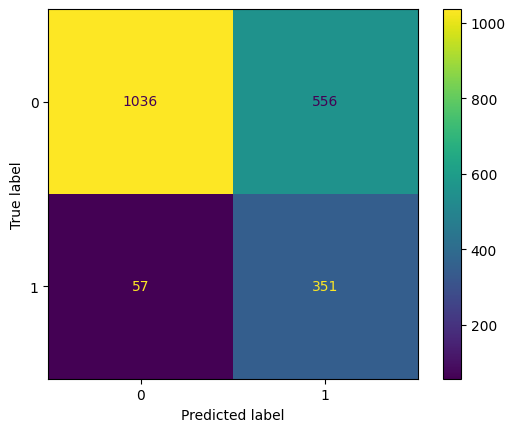

In [80]:
# plot the confusion matrix
rfg_preds = rfg_grid.predict(X_test)
rfg_cnf = confusion_matrix(y_test, rfg_preds)

disp = ConfusionMatrixDisplay(rfg_cnf, display_labels=rfg_grid.classes_)
disp.plot()
plt.show()

In [86]:
#Plot classification report
print(classification_report(y_test, rfg_preds))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77      1592
           1       0.39      0.86      0.53       408

    accuracy                           0.69      2000
   macro avg       0.67      0.76      0.65      2000
weighted avg       0.83      0.69      0.72      2000



In [92]:
# # Ploting feature importance
# best_rf_estimator = rfg_grid.best_estimator_ # get best estimator from the grid search

# best_rf_model = best_rf_estimator.named_steps["rf"]

# feature_importances = best_rf_model.feature_importances_

# print(feature_importances)

[0.05880675 0.12508318 0.06314112 0.34039291 0.02940599 0.0412347
 0.00698866 0.01836696 0.00477723 0.0559344  0.20102838 0.04949628
 0.00534343]


In [95]:
# plt.figure(figsize=(10, 6))
# plt.barh(X_train.columns, feature_importances, color='skyblue')
# plt.xlabel("Feature Importance")
# plt.ylabel("Feature")
# plt.gca().invert_yaxis()  # This will display the most important feature at the top
# plt.title("Feature Importance for Random Forest Model")
# plt.tight_layout()
# plt.show()

X_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')